The objective use the ARM ocean data and obtain a precipitation buoyancy relationship.
Buoyancy can be computed analytically (Ahmed and Neelin 2018, JAS) or using a numerical plume model (Ahmed and Neelin, 2021).

In [1]:
import pathlib
import importlib
import multiprocessing
import matplotlib.pyplot as plt
import xarray as xr
import warnings
import numpy as np
from time import perf_counter
import warnings


%matplotlib inline

In [2]:
arm_dir = pathlib.Path('/neelin2020/ARM/GoAmazon/')
fils_prc = [str(fil) for fil in arm_dir.glob('*.nc')]
fils_pwv = [str(fil) for fil in (arm_dir/'maoarmbecldrad').glob('*.nc')]

ds = xr.open_mfdataset(fils_prc)
ds_cwv = xr.open_mfdataset(fils_pwv)

In [3]:
precip = ds.precip_rate_sfc
pwv = ds_cwv.pwv * 10
precip = precip.sel(time = precip.time.isin(pwv.time))
assert np.all(pwv.time == precip.time)

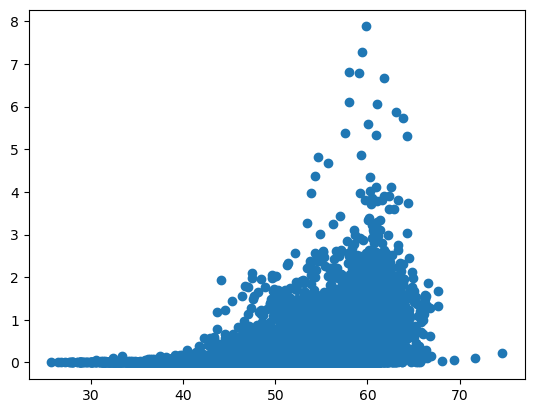

In [4]:
plt.scatter(pwv, precip)

In [5]:
cwv_bins = np.arange(0, 66., 2.)
bin_indx = np.digitize(pwv, cwv_bins, right=False)
precip_binned = np.zeros((cwv_bins.size - 1))
std_err = np.zeros((cwv_bins.size - 1))


for i in np.arange(cwv_bins.size-1):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ind = np.where(bin_indx == i)[0]
        precip_binned[i] = precip[ind].mean()
        std_err[i] = np.nanstd(precip[ind])/np.sqrt(ind.size)
    
    


(0.0, 0.6442363619706193)

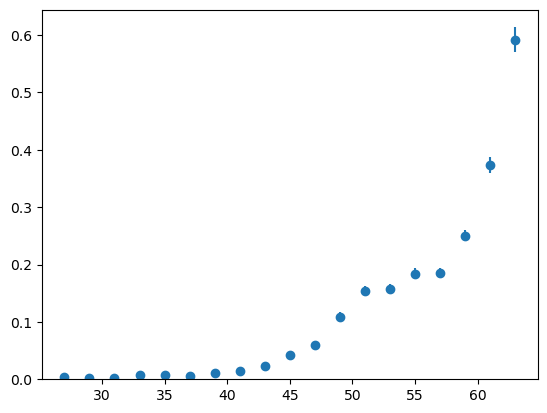

In [6]:
plt.errorbar(0.5 * (cwv_bins[1:] + cwv_bins[:-1]), precip_binned, yerr = std_err, fmt = 'o')
# plt.scatter(0.5 * (cwv_bins[1:] + cwv_bins[:-1]), precip_binned)
plt.ylim(bottom = 0)